# Potential Applications of Adjacency Matrix

## What is an Adjacency Matrix?

An adjacency matrix simply represents a graph in matrix form. To construct the matrix, we choose $n$ columns and $n$ rows, where $n$ is the number of nodes in the graph. The intersection of two nodes in the matrix is 1 if there is an edge between them and 0 otherwise. This can also be used to represent weighted graphs as well as directed graphs, as for two nodes there are two intersections in the matrix. The diagonal is reserved for edges that connect a node to itself.

In [1]:
import networkx as nx

G = nx.Graph()

G.add_edges_from([(0, 1), (1,2), (3,3), (8, 6), (1,3), (2, 3), (4,12), (0, 12), (1,8), (2,10), (4,0), (4, 5), (5, 11), (11, 13), (5, 6), (6,7), (7,8), (8,9), (9,2), (9, 10), (10, 10)])

#G.add_node(14)


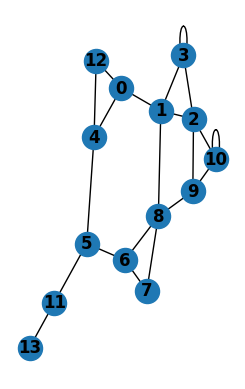

In [2]:
import matplotlib.pyplot as plt

subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

In [3]:
#Adjacency Matrix

import pandas as pd
import numpy as np

n = G.number_of_nodes()

matrix = np.array([[1 if G.has_edge(i, j) else 0 for j in range(n)] for i in range(n)])

df = pd.DataFrame(matrix, index=range(n), columns=range(n))


print("Adjacency matrix of Graph G")
print("Note that it is symmetric (as a result of being undirected)")

print(df)





Adjacency matrix of Graph G
Note that it is symmetric (as a result of being undirected)
    0   1   2   3   4   5   6   7   8   9   10  11  12  13
0    0   1   0   0   1   0   0   0   0   0   0   0   1   0
1    1   0   1   1   0   0   0   0   1   0   0   0   0   0
2    0   1   0   1   0   0   0   0   0   1   1   0   0   0
3    0   1   1   1   0   0   0   0   0   0   0   0   0   0
4    1   0   0   0   0   1   0   0   0   0   0   0   1   0
5    0   0   0   0   1   0   1   0   0   0   0   1   0   0
6    0   0   0   0   0   1   0   1   1   0   0   0   0   0
7    0   0   0   0   0   0   1   0   1   0   0   0   0   0
8    0   1   0   0   0   0   1   1   0   1   0   0   0   0
9    0   0   1   0   0   0   0   0   1   0   1   0   0   0
10   0   0   1   0   0   0   0   0   0   1   1   0   0   0
11   0   0   0   0   0   1   0   0   0   0   0   0   0   1
12   1   0   0   0   1   0   0   0   0   0   0   0   0   0
13   0   0   0   0   0   0   0   0   0   0   0   1   0   0


### Note that the matrix is symmetric 

### Unique Properties
$M_{ij}$ in $M^2$ represents the number of walks of length 2 from city i to j

$M^3$ is walks of length 3, etc

We can check $M^1$ through $M^n$ as the longest potential path is length $n$ to see if a path exists between two cities

New Matrix: 
 [[3 0 1 1 1 1 0 0 1 0 0 0 1 0]
 [0 4 1 2 1 0 1 1 0 2 1 0 1 0]
 [1 1 4 2 0 0 0 0 2 1 2 0 0 0]
 [1 2 2 3 0 0 0 0 1 1 1 0 0 0]
 [1 1 0 0 3 0 1 0 0 0 0 1 1 0]
 [1 0 0 0 0 3 0 1 1 0 0 0 1 1]
 [0 1 0 0 1 0 3 1 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 2 1 1 0 0 0 0]
 [1 0 2 1 0 1 1 1 4 0 1 0 0 0]
 [0 2 1 1 0 0 1 1 0 3 2 0 0 0]
 [0 1 2 1 0 0 0 0 1 2 3 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 2 0 0]
 [1 1 0 0 1 1 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 1]]


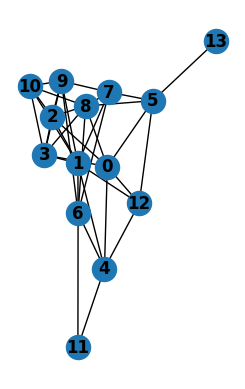

In [4]:
import pandas as pd
import numpy as np
import networkx as nx

matrix = np.linalg.matrix_power(matrix, 2)
n = matrix.shape[0]
G_new = nx.Graph()

# Iterate over the adjacency matrix and add edges
for i in range(n):
    for j in range(i + 1, n):  # to ensure each edge is added once (since undirected)
        if matrix[i, j] != 0:
            G_new.add_edge(i, j)
            
print("New Matrix: \n", np.round(matrix))

import matplotlib.pyplot as plt

subax1 = plt.subplot(122)
nx.draw(G_new, with_labels=True, font_weight='bold')


### Why does this work?


### How do we apply Adjacency Matrices to Neural Networks

# Algorithm 1

### What is the shortest walk from city i to city j

In [5]:
def shortest_path(G, city1, city2): 
    
    n = G.number_of_nodes() 
    
    matrix = np.array([[1 if G.has_edge(i, j) else 0 for j in range(n)] for i in range(n)]) #construct adjacency matrix

    
    for i in range(1, n): #Check all walk lengths
                
        #calculate M^i
        MtotheI = np.linalg.matrix_power(matrix, i) #There is room for optimization here
        
        value = MtotheI[city1][city2] #Number of walks length i between city1 and city2

        if(value > 0):
            print(f"Shortest Length is {i}")
            return

    print("No Path between Cities")   
    return




#TEST CASES

shortest_path(G, 1, 1) #We travel to a neighboring city, then right back, which is 2 trips. City 1 has 4 neighbors so 4 ways to do this.

shortest_path(G, 12, 10)

shortest_path(G, 13, 3)

#shortest_path(G, 14, 2)

#timeit

Shortest Length is 2
Shortest Length is 4
Shortest Length is 6


In [6]:
#Weighted Graphs

In [7]:
#Directed Graphs

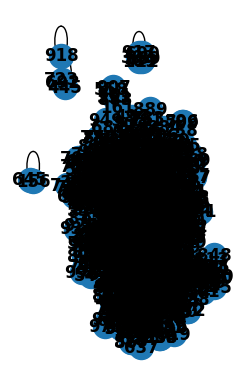

In [6]:
#Random Graphs
import random
import matplotlib.pyplot as plt


R = nx.Graph();
R.add_node(0);

for i in range(1000):
    latestnode = R.number_of_nodes()
    R.add_edge(latestnode, random.randint(0, latestnode))


subax1 = plt.subplot(121)
nx.draw(R, with_labels=True, font_weight='bold')
#Running time



### Runtime

One matrix multiplication is $n^3$, which can be computationally expensive. The worst case is when there is no connection between paths; we check all $M^{1...n}$ walk lengths, so the previous algorithm should be O($n^4$)

### Matrix Decomposition

Recall that Matrix $M$ is symmetric; therefore, we can write it as $PDP^{-1}$ where $D$ is a diagonalized matrix, or vector of length $n$. $(PDP^{-1})^a$ = $P D^a P^{-1}$ where a is any real number. This is much easier to compute.

In [59]:
import numpy as np
import pandas as pd


n = R.number_of_nodes()

A = np.array([[1 if R.has_edge(i, j) else 0 for j in range(n)] for i in range(n)])

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(A)

# Construct D and Pmatrix
D = np.diag(eigenvalues) ##VECTOR
P = eigenvectors


#P D P^-1

#P  D^4   P^-1
D = D ** 6

# Compute P^-1
try:
    P_inv = np.linalg.inv(P)
except np.linalg.LinAlgError:
    print("Matrix P is singular and cannot be inverted.")
    P_inv = np.linalg.pinv(P)  # Use pseudo-inverse if necessary


# Validate the decomposition
A_reconstructed = P @ D @ P_inv
is_valid = np.allclose(A, A_reconstructed, atol=1e-6)

print(A_reconstructed.round())

print(A)

print("A ≈ P D P^-1:", is_valid)


[[ 1.432e+03+0.j  0.000e+00+0.j -0.000e+00-0.j ...  1.000e+00-0.j
  -0.000e+00+0.j  0.000e+00-0.j]
 [ 0.000e+00+0.j  2.762e+03+0.j  0.000e+00-0.j ...  0.000e+00-0.j
  -0.000e+00-0.j  0.000e+00+0.j]
 [-0.000e+00-0.j  0.000e+00+0.j  5.190e+02-0.j ...  0.000e+00+0.j
   0.000e+00+0.j  0.000e+00+0.j]
 ...
 [ 1.000e+00+0.j -0.000e+00+0.j -0.000e+00+0.j ...  6.500e+01+0.j
  -0.000e+00-0.j  0.000e+00+0.j]
 [ 0.000e+00+0.j -0.000e+00+0.j  0.000e+00+0.j ... -0.000e+00+0.j
   2.200e+01-0.j -0.000e+00-0.j]
 [-0.000e+00+0.j -0.000e+00+0.j  0.000e+00-0.j ...  0.000e+00+0.j
   0.000e+00+0.j  6.000e+00+0.j]]
[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
A ≈ P D P^-1: False


### Optimized Algorithm

In [7]:
import numpy as np

#Algorithm 

#What is the shortest walk from city i to city j

def shortest_path_decomposition(G, city1, city2): 

    #make array from graph G
    n = G.number_of_nodes()
    matrix = np.array([[1 if G.has_edge(i, j) else 0 for j in range(n)] for i in range(n)])

    # Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    
    # Construct D and Pmatrix
    D = np.diag(eigenvalues) ##VECTOR
    D1 = D.copy()
    
    P = eigenvectors
        
    # Compute P^-1
    try:
        P_inverse = np.linalg.inv(P)
        
    except np.linalg.LinAlgError:
        print("Matrix P is singular and cannot be inverted.")
        P_inverse = np.linalg.pinv(P)  # Use pseudo-inverse if necessary
    
    
    # Validate the decomposition    
    for i in range(1, n):

        #calculate M^i     
        A_reconstructed = np.round(P @ D @ P_inverse)
        #print(A_reconstructed)
        value = A_reconstructed[city1][city2]
        
        #value = M[i][j]
        if(value > 0):
            print(f"Short Length is {i}")
            return

        D = D * D1

    print("No Path between Cities")   
    return

shortest_path_decomposition(R, 1, 500)

for i in range(0, 10):
    shortest_path_decomposition(R, random.randint(0, 500), random.randint(0, 500))
#We travel to a neighboring city, then right back, which is 2 trips. City 1 has 4 neighbors so 4 ways to do this.

#shortest_path_decomposition(R, 12, 10)

#shortest_path_decomposition(R, 13, 3)

#shortest_path_decomposition(R, 14, 2)


#Check Running time, compare with another algorithm and after optimization

Short Length is 7
Short Length is 26
Short Length is 31


/tmp/ipykernel_45247/2293828205.py:44: RuntimeWarning: overflow encountered in multiply
  D = D * D1
/tmp/ipykernel_45247/2293828205.py:35: RuntimeWarning: invalid value encountered in matmul
  A_reconstructed = np.round(P @ D @ P_inverse)
/tmp/ipykernel_45247/2293828205.py:44: RuntimeWarning: invalid value encountered in multiply
  D = D * D1


No Path between Cities
Short Length is 9
Short Length is 29
Short Length is 6
Short Length is 30
No Path between Cities
No Path between Cities
Short Length is 5


In [ ]:
#edge case
#0-1-2-3-4-5-6-7-n, path of length n where n is 1000, I want to check it and compare to dijkstras


In [10]:
# GPU Programming

import cupy as cp
import cugraph as cg
import cudf
import networkx as nx
import random

def nx_to_cugraph(G):
    df = nx.to_pandas_edgelist(G)
    gdf = cudf.DataFrame.from_pandas(df)
    return cg.from_cudf_edgelist(gdf, source='source', destination='target')

def shortest_path_decomposition(G, city1, city2):
    G_gpu = nx_to_cugraph(G)
    n = G.number_of_nodes()
    
    matrix = cp.zeros((n, n), dtype=cp.float32)
    for i, j in G.edges():
        matrix[i, j] = 1
    
    eigenvalues, eigenvectors = cp.linalg.eig(matrix)
    D = cp.diag(eigenvalues)
    D1 = D.copy()
    P = eigenvectors
    
    try:
        P_inverse = cp.linalg.inv(P)
    except cp.linalg.LinAlgError:
        print("Matrix P is singular and cannot be inverted.")
        P_inverse = cp.linalg.pinv(P)
    
    for i in range(1, n):
        A_reconstructed = cp.round(P @ D @ P_inverse)
        value = A_reconstructed[city1, city2]
        
        if value > 0:
            print(f"Shortest Length is {i}")
            return
        
        D = D @ D1
    
    print("No Path between Cities")
    return

R = nx.erdos_renyi_graph(501, 0.05)
R_gpu = nx_to_cugraph(R)

shortest_path_decomposition(R_gpu, 1, 500)

for i in range(10):
    shortest_path_decomposition(R_gpu, random.randint(0, 500), random.randint(0, 500))




ModuleNotFoundError: No module named 'cupy'

In [ ]:
Other stuff